# **1. Importações**

## Importação dos Avaliadores

In [38]:
#%pip install autorank

In [39]:
from utils.FileManager import FileManager
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from autorank import autorank, plot_stats, create_report

In [40]:
from avaliacao.AvaliadorDriftBase import AvaliadorBatch
from avaliacao.AvaliadorDriftBase import AvaliadorPassivo
from experimento.ExperimentoDrift import Experimento

## Importação dos Detectores

In [41]:
# Importando detectores de drift
from detectores.ADWINDetector import ADWINDetector
from detectores.DDMDetector import DDMDetector
from detectores.EDDMDetector import EDDMDetector
from detectores.FHDDMDetector import FHDDMDetector
from detectores.HDDM_ADetector import HDDM_ADetector
from detectores.PageHinkleyDetector import PageHinkleyDetector
from detectores.HDDM_WDetector import HDDM_WDetector
from detectores.KSWINDetector import KSWINDetector

## Importação dos Regressores Off-line

In [42]:
# Importando modelos offline
from regressores.modelosOffline.LinearRegressionModelo import LinearRegressionModelo
from regressores.modelosOffline.KneighborsRegressorModelo import KneighborsRegressorModelo
from regressores.modelosOffline.LassoRegressionModelo import LassoRegressionModelo
from regressores.modelosOffline.RidgeRegressionModelo import RidgeRegressionModelo
from regressores.modelosOffline.SVRModelo import SVRModelo
from regressores.modelosOffline.RandomForestModelo import RandomForestModelo
from regressores.modelosOffline.MLPRegressorModelo import MLPRegressorModelo

## Importação dos Regressores On-line

In [43]:
# Importando modelos online
from regressores.modelosOnline.BayesianLinearRegressionModelo import BayesianLinearRegressionModelo
from regressores.modelosOnline.HoeffdingTreeRegressorModelo import HoeffdingTreeRegressorModelo
from regressores.modelosOnline.KNNRegressorOnlineModelo import KNNRegressorOnlineModelo
from regressores.modelosOnline.LinearRegressionOnlineModelo import LinearRegressionOnlineModelo

# **2. Definindo os Dados e Parâmetros**

## Dados

In [ ]:
# Lista de séries temporais
series = [
    "AAPL",
    "B3SA3.SA",
    "^IXIC",
    "^DJI",
    "^GSPC",
    "^BVSP",
    "USDBRL=X"
]

## Parâmetros

In [ ]:
# Parâmetros do experimento
tamanho_batch = 50
lags = 5
repeticoes = 30  # Número de execuções para cada modelo-série

# **3. Definindo os Modelos e Avaliadores**

In [46]:
# Lista de modelos para o experimento
modelos = [
    {
        "nome": "LR + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "LR + HDDMa",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": HDDM_ADetector
    },
    {
        "nome": "LR + ADWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": ADWINDetector
    },
    {
        "nome": "LR + DDM",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": DDMDetector
    },
    
    
    
    {
        "nome": "KNN + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": KneighborsRegressorModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "KNN + HDDMa",
        "avaliador": AvaliadorBatch(),
        "modelo": KneighborsRegressorModelo,
        "detector": HDDM_ADetector
    },
    {
        "nome": "KNN + ADWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": KneighborsRegressorModelo,
        "detector": ADWINDetector
    },
    {
        "nome": "KNN + DDM",
        "avaliador": AvaliadorBatch(),
        "modelo": KneighborsRegressorModelo,
        "detector": DDMDetector
    },
    
    
    
    {
        "nome": "RF + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": RandomForestModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "RF + HDDMa",
        "avaliador": AvaliadorBatch(),
        "modelo": RandomForestModelo,
        "detector": HDDM_ADetector
    },
    {
        "nome": "RF + ADWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": RandomForestModelo,
        "detector": ADWINDetector
    },
    {
        "nome": "RF + DDM",
        "avaliador": AvaliadorBatch(),
        "modelo": RandomForestModelo,
        "detector": DDMDetector
    },
    
    
    {
        "nome": "BayesianLinear",
        "avaliador": AvaliadorPassivo(),
        "modelo": BayesianLinearRegressionModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "HoeffdingTree",
        "avaliador": AvaliadorPassivo(),
        "modelo": HoeffdingTreeRegressorModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "KNNRegressorOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": KNNRegressorOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "LinearRegressionOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": LinearRegressionOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },    
]

# **4. Executando o Experimento**

In [47]:
# Criando e executando o experimento
experimento = Experimento(
    series=series,
    modelos=modelos,
    tamanho_batch=tamanho_batch,
    lags=lags,
    repeticoes=repeticoes
)

resultados = experimento.executar()

[*********************100%***********************]  1 of 1 completed


Executando LR + KSWIN na série: AAPL
Executando LR + HDDMa na série: AAPL
Executando LR + ADWIN na série: AAPL
Executando LR + DDM na série: AAPL
Executando KNN + KSWIN na série: AAPL
Executando KNN + HDDMa na série: AAPL
Executando KNN + ADWIN na série: AAPL
Executando KNN + DDM na série: AAPL
Executando RF + KSWIN na série: AAPL
Executando RF + HDDMa na série: AAPL
Executando RF + ADWIN na série: AAPL
Executando RF + DDM na série: AAPL
Executando BayesianLinear na série: AAPL
Executando HoeffdingTree na série: AAPL
Executando KNNRegressorOnline na série: AAPL
Executando LinearRegressionOnline na série: AAPL


In [48]:
# salvando os resultados
arquivo_salvamento = "Experimento.csv"
FileManager.salvar_resultados(resultados, arquivo_salvamento)


Resultados salvos em: Experimento.csv


'Experimento.csv'

# **5. Análise Estatística dos Resultados**

## Leitura dos Resultados

In [60]:
# 1. Ler o arquivo CSV
df = pd.read_csv(arquivo_salvamento)

## Tabelas de Resultados

In [61]:
# 3. Agrupar por modelo e calcular estatísticas
summary = df.groupby(['serie', 'modelo']).agg(
    mae_mean=('mae', 'mean'),
    mae_std=('mae', 'std'),
    qtd_deteccoes_mean=('qtd_deteccoes', 'mean'),
    qtd_deteccoes_std=('qtd_deteccoes', 'std')
).reset_index()

### Média do MAE

In [62]:
# Tabela para a média do MAE
mae_mean_table = summary.pivot(index='serie', columns='modelo', values='mae_mean')
mae_mean_table

modelo,BayesianLinear,HoeffdingTree,KNN + ADWIN,KNN + DDM,KNN + HDDMa,KNN + KSWIN,KNNRegressorOnline,LR + ADWIN,LR + DDM,LR + HDDMa,LR + KSWIN,LinearRegressionOnline,RF + ADWIN,RF + DDM,RF + HDDMa,RF + KSWIN
serie,,,,,,,,,,,,,,,,
AAPL,0.058979,0.149921,0.506579,2.043198,0.393708,0.379224,0.275204,1.973920,1.973920,0.276230,0.393692,0.141638,0.505425,2.043490,0.389648,0.373526
B3SA3.SA,0.107375,0.133660,0.499697,0.354955,0.472865,0.393559,0.160490,0.583262,0.583262,0.583262,0.233271,0.133660,0.468481,0.621453,0.371059,0.368400
USDBRL=X,0.125269,0.145916,0.476951,0.369914,0.433332,0.473532,0.159729,0.263924,0.259585,0.275361,0.159512,0.145916,0.396975,0.479296,0.306190,0.441566
^BVSP,0.093686,0.161977,0.831398,2.122452,0.491025,0.509862,0.293664,2.091479,2.091479,0.204360,0.480013,0.154411,0.824235,2.110972,0.423594,0.497145
^DJI,0.056613,0.162422,0.543794,2.148380,0.450167,0.398753,0.195455,1.625687,1.997505,0.717084,0.302257,0.153118,0.544516,2.141306,0.434618,0.394707
^GSPC,0.050714,0.144166,0.521799,1.901206,0.411979,0.345738,0.187536,1.685354,1.777998,1.777998,0.356245,0.135540,0.517840,1.893169,0.412205,0.337469
^IXIC,0.062195,0.141358,0.551662,1.699345,0.578949,0.432203,0.219463,1.611452,1.611452,1.611452,0.386306,0.134533,0.538125,1.701910,0.567073,0.405840


### Desvio do MAE

In [63]:
# Tabela para o desvio padrão do MAE
mae_std_table = summary.pivot(index='serie', columns='modelo', values='mae_std')
mae_std_table

modelo,BayesianLinear,HoeffdingTree,KNN + ADWIN,KNN + DDM,KNN + HDDMa,KNN + KSWIN,KNNRegressorOnline,LR + ADWIN,LR + DDM,LR + HDDMa,LR + KSWIN,LinearRegressionOnline,RF + ADWIN,RF + DDM,RF + HDDMa,RF + KSWIN
serie,,,,,,,,,,,,,,,,
AAPL,0.0,0.0,0.0,0.0,0.0,0.009221,0.000000e+00,2.258405e-16,2.473959e-16,7.644738e-17,0.062764,0.0,0.001520,0.000727,0.006917,0.026159
B3SA3.SA,0.0,0.0,0.0,0.0,0.0,0.011397,0.000000e+00,1.051230e-16,1.090913e-16,1.700066e-16,0.066643,0.0,0.002349,0.005577,0.025724,0.016648
USDBRL=X,0.0,0.0,0.0,0.0,0.0,0.033856,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.012529,0.0,0.020979,0.136874,0.022630,0.035385
^BVSP,0.0,0.0,0.0,0.0,0.0,0.000494,0.000000e+00,8.246530e-17,0.000000e+00,3.533460e-17,0.255087,0.0,0.009539,0.003298,0.027813,0.002206
^DJI,0.0,0.0,0.0,0.0,0.0,0.013398,0.000000e+00,0.000000e+00,0.000000e+00,4.609950e-17,0.044387,0.0,0.002248,0.004642,0.001451,0.018062
^GSPC,0.0,0.0,0.0,0.0,0.0,0.003787,0.000000e+00,2.181827e-16,2.061632e-16,1.166235e-16,0.112869,0.0,0.001395,0.002150,0.002201,0.002457
^IXIC,0.0,0.0,0.0,0.0,0.0,0.004292,2.123870e-07,1.009989e-16,2.508084e-16,2.332471e-16,0.099585,0.0,0.001942,0.001683,0.007181,0.005661


### Média Detecções

In [64]:
# Tabela para a média das detecções
deteccoes_mean_table = summary.pivot(index='serie', columns='modelo', values='qtd_deteccoes_mean')
deteccoes_mean_table

modelo,BayesianLinear,HoeffdingTree,KNN + ADWIN,KNN + DDM,KNN + HDDMa,KNN + KSWIN,KNNRegressorOnline,LR + ADWIN,LR + DDM,LR + HDDMa,LR + KSWIN,LinearRegressionOnline,RF + ADWIN,RF + DDM,RF + HDDMa,RF + KSWIN
serie,,,,,,,,,,,,,,,,
AAPL,NaN,NaN,4.0,0.0,5.0,7.233333,NaN,0.0,0.0,2.0,5.033333,NaN,4.0,0.0,5.000000,7.233333
B3SA3.SA,NaN,NaN,4.0,1.0,5.0,6.933333,NaN,0.0,0.0,0.0,2.833333,NaN,4.0,0.0,3.066667,7.133333
USDBRL=X,NaN,NaN,3.0,0.0,6.0,7.366667,NaN,1.0,2.0,0.0,3.766667,NaN,3.0,1.6,2.900000,7.466667
^BVSP,NaN,NaN,3.0,0.0,7.0,8.000000,NaN,0.0,0.0,1.0,4.166667,NaN,3.0,0.0,4.700000,8.000000
^DJI,NaN,NaN,5.0,0.0,6.0,7.033333,NaN,1.0,0.0,1.0,4.200000,NaN,5.0,0.0,5.900000,7.200000
^GSPC,NaN,NaN,4.0,0.0,5.0,8.000000,NaN,1.0,0.0,0.0,5.033333,NaN,4.0,0.0,5.000000,8.000000
^IXIC,NaN,NaN,5.0,0.0,7.0,8.000000,NaN,0.0,0.0,0.0,4.866667,NaN,5.0,0.0,6.966667,8.000000


## Teste Estatístico

In [65]:
# 4. Preparar dados para autorank (uma linha por repetição, colunas por modelo)
df_mae = df.pivot_table(index=["serie", "repeticao"], columns="modelo", values="mae")
# Remover qualquer valor NaN para análise (caso haja)
df_mae = df_mae.dropna()
# Tabela de desempenho
df_mae

modelo           BayesianLinear  HoeffdingTree  KNN + ADWIN  KNN + DDM  \
serie repeticao                                                          
AAPL  1                0.058979       0.149921     0.506579   2.043198   
      2                0.058979       0.149921     0.506579   2.043198   
      3                0.058979       0.149921     0.506579   2.043198   
      4                0.058979       0.149921     0.506579   2.043198   
      5                0.058979       0.149921     0.506579   2.043198   
...                         ...            ...          ...        ...   
^IXIC 26               0.062195       0.141358     0.551662   1.699345   
      27               0.062195       0.141358     0.551662   1.699345   
      28               0.062195       0.141358     0.551662   1.699345   
      29               0.062195       0.141358     0.551662   1.699345   
      30               0.062195       0.141358     0.551662   1.699345   

modelo           KNN + HDDMa  KNN + KSWIN  KNNRegressorOnline  LR + ADWIN  \
serie repeticao                                                             
AAPL  1             0.393708     0.372191            0.275204    1.973920   
      2             0.393708     0.372321            0.275204    1.973920   
      3             0.393708     0.372219            0.275204    1.973920   
      4             0.393708     0.390651            0.275204    1.973920   
      5             0.393708     0.374569            0.275204    1.973920   
...                      ...          ...                 ...         ...   
^IXIC 26            0.578949     0.429791            0.219463    1.611452   
      27            0.578949     0.431413            0.219463    1.611452   
      28            0.578949     0.432916            0.219463    1.611452   
      29            0.578949     0.430509            0.219463    1.611452   
      30            0.578949     0.430835            0.219463    1.611452   

modelo           LR + DDM  LR + HDDMa  LR + KSWIN  LinearRegressionOnline  \
serie repeticao                                                             
AAPL  1          1.973920    0.276230    0.067029                0.141638   
      2          1.973920    0.276230    0.407341                0.141638   
      3          1.973920    0.276230    0.390607                0.141638   
      4          1.973920    0.276230    0.403821                0.141638   
      5          1.973920    0.276230    0.407369                0.141638   
...                   ...         ...         ...                     ...   
^IXIC 26         1.611452    1.611452    0.290474                0.134533   
      27         1.611452    1.611452    0.571836                0.134533   
      28         1.611452    1.611452    0.302751                0.134533   
      29         1.611452    1.611452    0.313237                0.134533   
      30         1.611452    1.611452    0.298903                0.134533   

modelo           RF + ADWIN  RF + DDM  RF + HDDMa  RF + KSWIN  
serie repeticao                                                
AAPL  1            0.504676  2.043782    0.383347    0.418058  
      2            0.505191  2.044918    0.389018    0.351158  
      3            0.504272  2.043562    0.390162    0.378630  
      4            0.505950  2.043238    0.380700    0.354910  
      5            0.503904  2.044034    0.393396    0.350207  
...                     ...       ...         ...         ...  
^IXIC 26           0.540540  1.701173    0.565712    0.403149  
      27           0.540365  1.703295    0.567160    0.404892  
      28           0.536435  1.702158    0.559428    0.411076  
      29           0.537294  1.700521    0.572057    0.406438  
      30           0.535529  1.703623    0.566753    0.410554  

[210 rows x 16 columns]

In [66]:
# computing the most appropriate statistical test
results = autorank(-df_mae)
# printing the report
create_report(results)

The statistical analysis was conducted for 16 populations with 210 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations RF + DDM (p=0.000), KNN + DDM (p=0.000), LR + DDM (p=0.000), LR + ADWIN (p=0.000), KNN + ADWIN (p=0.000), RF + ADWIN (p=0.000), LR + HDDMa (p=0.000), KNN + HDDMa (p=0.000), KNN + KSWIN (p=0.000), RF + HDDMa (p=0.000), RF + KSWIN (p=0.000), LR + KSWIN (p=0.000), KNNRegressorOnline (p=0.000), HoeffdingTree (p=0.000), LinearRegressionOnline (p=0.000), and BayesianLinear (p=0.000). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We r

<Axes: >

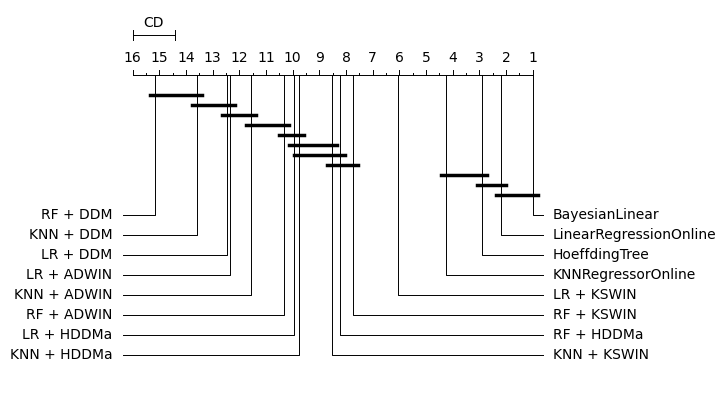

In [67]:
# plotting the results
plot_stats(results, allow_insignificant=True)